In [1]:
import numpy as np
import pandas as pd

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [40]:
flights = pd.read_csv('data/flights.csv', index_col=0)
flights['speed'] = 60 * flights['distance'] / flights['air_time']
flights = flights[['carrier', 'dep_delay', 'speed']]
flights.dropna(subset=['dep_delay', 'speed'], inplace=True)

carriers = pd.read_csv('data/airlines.csv')
flights = flights.merge(carriers, how = 'left', on = 'carrier' )
flights['carrier'] = flights['name']
flights.drop(columns='name', inplace=True)
flights = flights.melt(id_vars='carrier', value_name='value', var_name='type')
flights.head()

,carrier,type,value
0,United Air Lines Inc.,dep_delay,2.0
1,United Air Lines Inc.,dep_delay,4.0
2,American Airlines Inc.,dep_delay,2.0
3,JetBlue Airways,dep_delay,-1.0
4,Delta Air Lines Inc.,dep_delay,-6.0


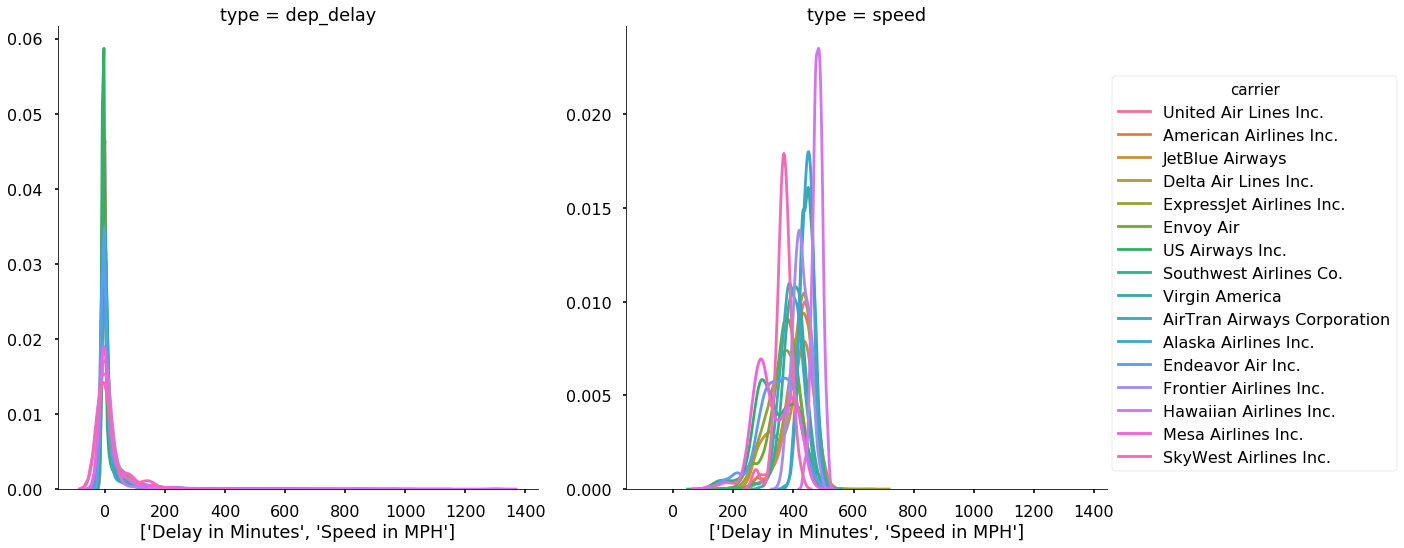

In [41]:
with sns.plotting_context('poster'):
    grid = sns.FacetGrid(flights, col = 'type', hue = 'carrier', size=8, sharey=False)
    grid.map(sns.kdeplot, 'value')
    grid.add_legend();
    grid.set_xlabels(label=['Delay in Minutes', 'Speed in MPH'])

In [47]:
grid.axes[1]


IndexError: index 1 is out of bounds for axis 0 with size 1